In [37]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate, stats, special

# 3
$$Pois(k|\lambda) = \frac{e^{-\lambda} \lambda^k}{k!} = \frac{e^{-\lambda- k\ln \lambda}}{k!} \approx_{\text{large }k} \frac{e^{-\lambda- k \ln (\lambda/k)}}{\sqrt{2\pi\lambda}}$$

In [2]:
poisson_pmf = lambda k, lmbda: np.exp(-lmbda + k * np.log(lmbda)) / np.math.factorial(k)
poisson_pmf_stirling_approx = lambda k, lmbda: 1. / np.sqrt(2 * np.pi * np.square(k)) * np.exp(k-lmbda + k * (np.log(lmbda/k)))
gaussian_pdf = lambda x, mu, sigma_squared: 1. / (np.sqrt(2 * np.pi) * sigma_squared) * np.exp(-1./2 * np.square((x-mu))/sigma_squared)
normal_pdf = lambda x: gaussian_pmf(x, 1, 0)

In [3]:
x_range = np.arange(700, 1301)

# We use the stirling approximation because lambda is sufficiently large
# In fact, if we don't, we encounter an overflow error.
poisson_samples = poisson_pmf_stirling_approx(x_range, 1000.)
gaussian_samples = gaussian_pdf(x_range, 1000., 1000.)

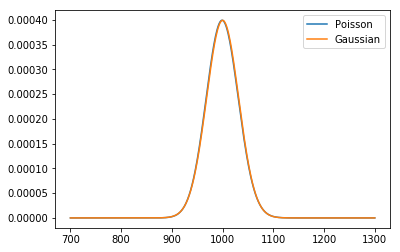

In [4]:
# Linear Plots

plt.plot(x_range, poisson_samples, label="Poisson")
plt.plot(x_range, gaussian_samples, label="Gaussian")
plt.legend()

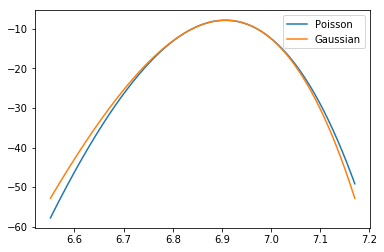

In [5]:
# Log-log Plots

x_range_log = np.log(x_range)
poisson_samples_log = np.log(poisson_samples)
gaussian_samples_log = np.log(gaussian_samples)

plt.plot(x_range_log, poisson_samples_log, label="Poisson")
plt.plot(x_range_log, gaussian_samples_log, label="Gaussian")
plt.legend()

# Comments on Similarities
On the linear plot, the two distributions are almost indistinguishable, though we notice that the poisson distribution's peak's bulge narrowly precedes that of the Gaussian on the left-hand side. On the log-log plot, we see this bulge actually decreases more rapidly to the left for the Poisson distribution than the Gaussian. Meanwhile the Poisson distribution decreases less rapidly on the right side. This is because the Poisson distribution ends at $k=0$ while the Gaussian distribution extends into the negative numbers. Both of these distributions need to realize 50% of their probability in the range $k < 0$ (or $x < 0$), so the Poisson distribution bulges earlier. We also see that this requirement forces the left tail of the Poisson distribution to go to zero faster than that of the Gaussian.

In [6]:
# Quantify Similarities

# Let us consider the left-handed tail first, integrating from 700 to 900 
# (as this is about where the inflection point occurs)

poisson_left_tail_area = np.sum(poisson_samples[:200])
gaussian_left_tail_area = np.sum(gaussian_samples[:200])

print('Poisson left tail area {}.\nGaussian left tail area {}.'
      .format(poisson_left_tail_area, gaussian_left_tail_area))

# We repeat with the right side from 1100 1300
poisson_right_tail_area = np.sum(poisson_samples[400:])
gaussian_right_tail_area = np.sum(gaussian_samples[400:])

print('\nPoisson right tail area {}.\nGaussian right tail area {}.'
      .format(poisson_right_tail_area, gaussian_right_tail_area))


Poisson left tail area 2.08563890411e-05.
Gaussian left tail area 2.34295547974e-05.

Poisson right tail area 2.89151292799e-05.
Gaussian right tail area 2.61176067384e-05.


Indeed we see the left tail of the Poisson goes to zero faster than that of the Gaussian. To compensate this forces the bulge near the average of the Poisson distribution to lean to the left.

# 4b

Mock temperature set:
[ 9.95821794 11.60297885  9.01146021 10.47203249 11.21164036  8.53452536
  8.33705372 10.61004081  9.9939039  10.01091503]


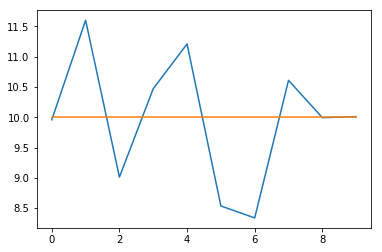

In [29]:
# TODO: check whether we can use numpy's default options
n_elements_per_temperature_set = 10

create_temperature_set = lambda n_elements: np.random.normal(10, 1, n_elements) # mean, stdev, size of sample set

temperature_set = create_temperature_set(n_elements_per_temperature_set)

plt.plot(temperature_set)
plt.plot(10 * np.ones(n_elements_per_temperature_set))
print("Mock temperature set:\n{}".format(temperature_set))

# i

We want to find $\theta_1$ that minimizes $\chi^2$, i.e.

$$\theta_1 = \text{argmin}_{\theta_1} \chi^2 = \text{argmin}_{\theta_1} \sum_{i=1}{10}\frac{(T(t_i; \theta_1) - T_i)^2}{\Delta T^2}, $$

where $\Delta T^2$ is the variance **in our data**, and $T(t_i; \theta_1) = \theta_1$ for the constant temperature model. In this case, it's still exactly possible by differentiating with respect to $\theta_1$ and setting to 0 (you would get the average of $\{T_i\}$ (the first moment contains the most information about the distribution), but let's do it exactly.

Theta_1 estimated to be 9.974, for distribution with mean 9.974276867


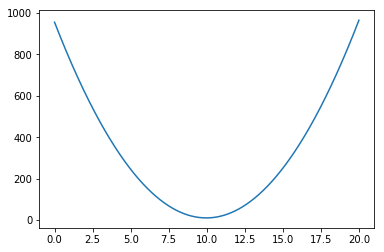

In [158]:
def fit_data_constant_model(data_set, search_space, plot=False):
    # Returns the \theta parameterizing model T(t) = \theta
    # that best-fits the provided mock data set `data_set` and corresponding chi^2
    # by locally minimizing the chi^2 function.
    # `search_space` is selection of (discretizing) theta_1 values to consider.
    chi_squared = np.zeros(search_space.size)
    
    T = lambda t_i, theta_1: theta_1 # Not necessary but reminds me of the origins of this term
    
    delta_t_squared = np.var(data_set)

    for i in range(0, search_space.size):
        for t_i in range(0, data_set.size):
            chi_squared[i] += np.power((T(t_i, search_space[i]) - data_set[t_i]), 2) / delta_t_squared
        
    if plot:
        plt.plot(search_space, chi_squared)
        
    min_idx = np.argmin(chi_squared)
    return search_space[min_idx], chi_squared[min_idx]

def temperature_set_constant_model():
    # From the data set, itself, I can already predict that a constant model should be close to the mean value.
    search_space = np.arange(0, 20, 0.001)

    theta_1_hat, chi_squared_min = fit_data_constant_model(temperature_set, 
                                                           search_space, plot=True)
    
    print("Theta_1 estimated to be {}, for distribution with mean {}".format(theta_1_hat, np.mean(temperature_set)))
    
temperature_set_constant_model()

# ii.

Theoretically, we expect $\chi^2_{\text{min}}$ to follow a $\chi^2_{k-1}$ distribution, where $k$ is the number of degrees of freedom (in this case $k-1=10-1=9$).

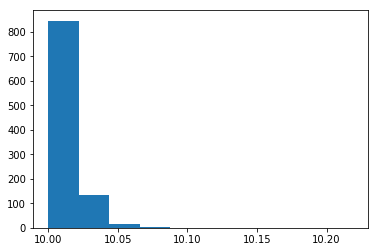

In [204]:
temperature_sets = create_temperature_set(1000*10).reshape((1000,10))
    
def plot_temperature_sets_constant_model(search_space):
    chi_squared_values = np.zeros(temperature_sets.shape[0])
    
    for i in range(temperature_sets.shape[0]):
        _, chi_squared_values[i] = fit_data_constant_model(temperature_sets[i], search_space)
        
    plt.hist(chi_squared_values)

    return chi_squared_values
    
constant_model_chis = plot_temperature_sets_constant_model(np.arange(5, 15, .1))

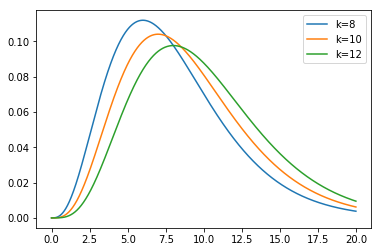

In [206]:
xs = np.arange(0, 20, 0.01)
plt.plot(xs, stats.chi2.pdf(xs, 8), label="k=8")
plt.plot(xs, stats.chi2.pdf(xs, 9), label="k=10")
plt.plot(xs, stats.chi2.pdf(xs, 10), label="k=12")
plt.legend()

**Something seems to be going wrong with my calculation of chi_min but I couldn't figure out what it is**

I couldn't print them on top of eachother because then the histogram bars wouldn't show up

## iii)

Theta_1 estimated to be 9.97, Theta_2 to be -0.07


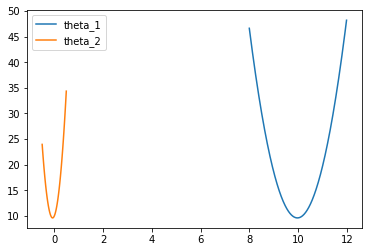

In [161]:
def fit_data_2_param_model(data_set, search_space_theta_1, search_space_theta_2, plot=False):
    # Returns the \theta parameterizing model T(t) = \theta
    # that best-fits the provided mock data set `data_set` and corresponding chi^2
    # by locally minimizing the chi^2 function.
    # `search_space` is selection of (discretizing) theta_1 values to consider.
    T = lambda t, theta_1, theta_2: theta_1 + theta_2 * (t - 4.5)
    
    chi_squared = np.zeros((search_space_theta_1.size, search_space_theta_2.size))
    
    delta_t_squared = np.var(data_set)

    for i in range(0, search_space_theta_1.size):
        for j in range(0, search_space_theta_2.size):
            for t_i in range(0, data_set.size):
                chi_squared[i, j] += np.power((T(t_i, search_space_theta_1[i], search_space_theta_2[j]) - data_set[t_i]), 2) / delta_t_squared
        
    if plot:
        plt.plot(search_space_theta_1, np.min(chi_squared, axis=1), label="theta_1")
        plt.plot(search_space_theta_2, np.min(chi_squared, axis=0), label="theta_2")
        plt.legend()
        
    min_i, min_j = np.unravel_index(np.argmin(chi_squared), chi_squared.shape)
    return search_space_theta_1[min_i], search_space_theta_2[min_j], chi_squared[min_i, min_j]

def temperature_set_2_param_model():
    # Knowing that the data actually does not have a time dependence, we expect the result for
    # theta_1 to be close to the result from before, and theta_2 to be quite small
    search_space_theta_1 = np.arange(8, 12, 0.01)
    search_space_theta_2 = np.arange(-0.5, 0.5, 0.01)

    theta_1_hat, theta_2_hat, chi_squared_min = fit_data_2_param_model(temperature_set, 
                                                                        search_space_theta_1, 
                                                                        search_space_theta_2, 
                                                                        plot=True)
    
    print("Theta_1 estimated to be {}, Theta_2 to be {}".format(theta_1_hat, theta_2_hat))
    
temperature_set_2_param_model()

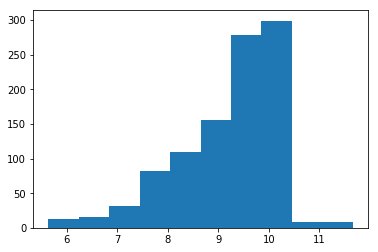

In [191]:
def plot_temperature_sets_2_param_model(search_space_theta_1, search_space_theta_2):
    chi_squared_values = np.zeros(temperature_sets.shape[0])
    
    for i in range(temperature_sets.shape[0]):
        _, _, chi_squared_values[i] = fit_data_2_param_model(temperature_sets[i], search_space_theta_1, search_space_theta_2)
        
    plt.hist(chi_squared_values)
    
    return chi_squared_values
    
two_param_chis = plot_temperature_sets_2_param_model(np.arange(9.5, 10.5, .01), np.arange(-0.1, 0.1, .01))


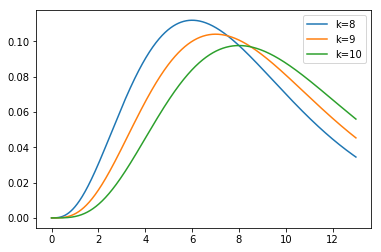

In [207]:
xs = np.arange(0, 13, 0.01)
plt.plot(xs, stats.chi2.pdf(xs, 8), label="k=8")
plt.plot(xs, stats.chi2.pdf(xs, 9), label="k=9")
plt.plot(xs, stats.chi2.pdf(xs, 10), label="k=10")
plt.legend()

**This looks better than the previous one, but still something is off on the x-axis**

We now expect it to resemble a $\chi_k^2$ distribution for $k=10-2=8$.
In general, $\chi_{\text{min}}^2$ should resemlbe $\chi_k^2$ where $k$ is the number of original degrees of freedom minus the number of constrained/determined degrees of freedom (which now has become 2).



# 5

## a)
We are given:

The number of background events, $b$:
$$b = 0.3$$

The number of signal events, $s$:
$$s = 4.9$$

We define the expectation value of the number of events, $\mu$.

Our hypotheses are:
$$H_{\text{null}}:  \mu_{\text{null}} = b, $$
$$H_{\text{alt}}:  \mu_{\text{alt}} = b + s.$$

The PMF for a Poisson process is:
$$f(k) = \frac{\lambda^k e^{-\lambda}}{k!},$$
with $\mu = \sigma^2 = \lambda$

So, for our hypotheses:
$$f_{\text{null}}(k) = \frac{(\mu_{\text{null}})^k e^{-\mu_{\text{null}}}}{k!}= \frac{b^k e^{-b}}{k!}.$$
$$f_{\text{alt}}(k) = \frac{\mu_{\text{alt}}^k e^{-\mu_{\text{alt}}}}{k!} = \frac{(b+s)^k e^{-(b+s)}}{k!}.$$

## b)

We choose our test statistic to be $k_m$, the number of measured events ($=5$).

The p-value is given by:
$$p = \sum_{k\geq k_m}f(k|\mu_null).$$

Solving (using the function `poisson_pmf` defined earlier):

In [43]:
# We choose an appropriate cutoff point (say 30);
mu_null = 0.3
mu_alt = 5.2

k_m = 5
cutoff = 30
ks = np.arange(k_m, cutoff)
probs = np.zeros(ks.size)

for i, k in enumerate(ks): 
    probs[i] = poisson_pmf(k, mu_null)
    
p_val = np.sum(probs)
    
print("p-value = {}".format(p_val))

p-value = 1.57850405417e-05


As confidence level, this is 99.99%
To see what standard deviation this corresponds to, we have to solve the following equation for $x$

$$ 1.578\times 10^{-5} = p = \int_{x}^\infty N(x; 0, 1)\ dx =\int_{0}^\infty N(x; 0, 1)\ dx - \int_{0}^{x} N(x; 0, 1)\ dx  = \frac{\sqrt{\pi}}{2}\left[1 - \text{erf}\left(\frac{x}{\sqrt{2}}\right)\right],$$


$$ x = \sqrt{2}\ \text{erf}\ ^{-1}\left(1 - \frac{2}{\sqrt{\pi}}p\right) = 3.75$$

This corresponds to 3.75 standard deviations.

## c)
The false negative rate is $\beta$, where

$$\beta = \int_{-\infty}^{t_\alpha} P_{\text{alt}}(t)dt.$$

and $t_\alpha$ is the value of the test statistic at our significance level ($\alpha = 0.05$), i.e.

$$t_\alpha: 0.05 = \int_{t_\alpha}^{\infty} p_{\text{alt}}(t)dt.$$

Technically, **we're interested in a discrete PMF**, not a continuous PDF, we could have written this with a sum, and the idea is exactly the same (the bottom of the sum for $\beta$ would be 0). The explicit discrete nature will show up in a moment (when we use the cumulative distribution function).

To get an explicit equation for $t_\alpha$, we rewrite (similarly to b):

$$ 0.05 = \int_0^\infty p_{\text{alt}}(t)dt - \int_0^{t_\alpha} p_{\text{alt}}(t)dt = 1 - e^{-\lambda}\sum_{i=0}^{\text{floor}(t_\alpha)} \frac{\lambda^i}{i!}|_{\lambda=b= 0.3} $$

having used the definition of the cumulative distribution function for the poisson distribution.

This reveals an iterative procedure to identify the value of $t_\alpha$. 

$$ 0.95 \cdot e^{0.3} = \sum_{i=0}^{n} \frac{0.3^i}{i!} $$

Consider the series of partial sums defined on the right hand side for $n=0, 1, 2, \dots$. The first time we exceed the value on the left-hand side, we know we have reached $n=\text{ceil}(t_\alpha)$. 

The ceiling of $t_\alpha$ will actually lead to a higher calculated false negative rate than the floor, so to be conservative in our estimates, it's best to take this value. Solving with a bit of python, we get:

In [54]:
significance_level = 0.05

def get_t_alpha(significance_level, mu):
    threshold = (1 - significance_level) * np.exp(mu)
    partial_sum = 0
    i = 0
    
    while partial_sum < threshold:
        partial_sum += np.power(mu, i) / np.math.factorial(i)
        i += 1
    
    print("Threshold was {}, passed with partial sum {}".format(threshold, partial_sum))
        
    return i
    
print("t_\\alpha is {}".format(get_t_alpha(significance_level, mu_null)))

Threshold was 1.2823658672, passed with partial sum 1.3
t_\alpha is 2


So the value of our test statistic (the number of measured events), $t_\alpha$, corresponding to a significance level of $\alpha = 0.05$ is, conservatively, $t_\alpha=2$. Now, we can evaluate $\beta$, and get the statistical power.

In [57]:
def get_beta(significance_level, mu_null, mu_alt):
    t_alpha = get_t_alpha(significance_level, mu_null)
    
    beta = 0
    
    for i in range(0, t_alpha + 1):
        beta += np.power(mu_alt, i) / np.math.factorial(i)
        
    beta *= np.exp(-mu_alt)
    
    return beta

def get_statistical_power(significance_level, mu_null, mu_alt):
    beta = get_beta(significance_level, mu_null, mu_alt)

    return 1-beta

print("Beta is {} and the statistical power (1-Beta) is {}.".format(
    get_beta(0.05, mu_null, mu_alt),      
    get_statistical_power(0.05, mu_null, mu_alt))) # Alright, unnecessary duplicate computations, whatever
    
    

Threshold was 1.2823658672, passed with partial sum 1.3
Threshold was 1.2823658672, passed with partial sum 1.3
Beta is 0.108786650377 and the statistical power (1-Beta) is 0.891213349623.


Type I error rate is $\alpha$ (as we required so as to define $\beta$) is $\alpha=0.05$.

Type II error rate is $\beta$ (as we just calculated) is $\beta=0.11$.

# 6
## a)


(array([  8.,   8., 296., 282., 155., 107.,  84.,  32.,  15.,  13.]),
 array([-1.64882307, -1.04732177, -0.44582047,  0.15568083,  0.75718213,
         1.35868343,  1.96018473,  2.56168603,  3.16318733,  3.76468863,
         4.36618993]),
 <a list of 10 Patch objects>)

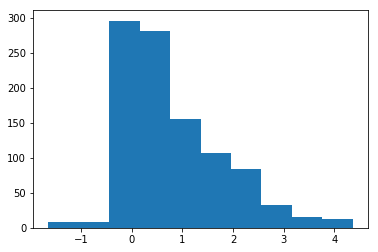

In [192]:
delta_chis = constant_model_chis - two_param_chis

plt.hist(delta_chis)

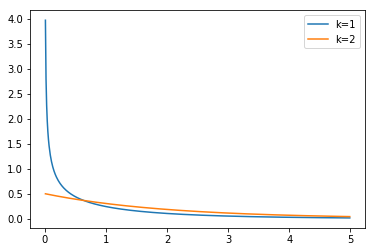

In [208]:
xs = np.arange(0.01, 5, 0.01)

plt.plot(xs, stats.chi2.pdf(xs, 1), label="k=1")
plt.plot(xs, stats.chi2.pdf(xs, 2), label="k=2")

plt.legend()

We expect $k=1$ because the number of degrees of freedom of $\Delta \chi^2$ should be equal to the difference in the number of degrees of freedom of the null and alternate hypothesis, which in this case is $9-8=1$. Indeed, these are somewhat similar, but not entirely, and again, I believe this is due to a fault with my evaluation of the chi-squared scores for the constant parameter model. I believe the two-parameter model for whatever reason (even though it might be thought of as more difficult) did yield closer to the right results.

## b)

1) The first technique is obvious: simply increase the amount of measurements per trial (take the limit $k\rightarrow\infty$ in the above example). Your estimates for the various parameters of interest (mean and variance) will converge to the true result (in the infinite sampling limit), and the probability of either false negative or false positive decreases as the null and alternate distributions become more sharply peaked.

2) The other possibility is to reject your null hypothesis at a lower significance level. This pushes your test statistic farther away from the typical value reached in the alternate case, which decreases the amount of overlap between the two distributions that needs to be factored in evaluating beta, so beta is smaller and the statistical power is higher